# RL Analysis Continued—Exploratory Visualizations

## Part II: Exploratory Visualizations

## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ^ remember to remove numpy / other packages if you don't end up using them

## Loading in our dataframes

In [2]:
df = pd.read_pickle("/Users/Terru/Desktop/RL-Analysis/dataframes/df.pkl")
blue_players = pd.read_pickle("/Users/Terru/Desktop/RL-Analysis/dataframes/blue_players.pkl")
orange_players = pd.read_pickle("/Users/Terru/Desktop/RL-Analysis/dataframes/orange_players.pkl")

### Investigating what we have to work with

In [3]:
blue_players.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114783 entries, 0 to 114782
Data columns (total 101 columns):
 #    Column                                           Dtype         
---   ------                                           -----         
 0    series_id                                        int64         
 1    player._id                                       object        
 2    player.slug                                      object        
 3    player.tag                                       object        
 4    player.country                                   object        
 5    stats.core.shots                                 float64       
 6    stats.core.goals                                 float64       
 7    stats.core.saves                                 float64       
 8    stats.core.assists                               float64       
 9    stats.core.score                                 float64       
 10   stats.core.shootingPercentage             

The main quantitative analytical features we are likely to be interested in include:  
-Shots  
-Goals  
-Saves  
-Assists  
-Score  
-Shooting percentage  
-Goal participation  
-Rating  
-Boost used per minute (bpm)  
-Boost amount stolen  
-Time spent at 0-25/25-50/50-75/75-100 boost  
-Average speed  
-Time supersonic  
-Powerslide count  
-Percentage of time on the ground/low air/high air  
-Average distance to ball  
-Percentage of time in defensive/neutral/offensive third, defensive/offensive half  
-Time behind/in front of the ball  
-Number of goals against while last defender  
-Demos inflicted, and  
-Demos taken

We'll have to be careful about the data we're given, and perform feature engineering as needed to obtain the numerical data we actually want. For example, every variable is given as a total across an entire series, but if we want, say, average score per game, we'll need to access the data for that given series in *df*, then sum up the blue and orange team game scores to find the total number of games in the series to divide by. Some stats can't be feature engineered in this way, though, such as shooting percentage (there's no way we can learn what a player's shooting percentage was in each individual game). 

In [4]:
pd.options.display.max_columns = None
blue_players

,series_id,player._id,player.slug,player.tag,player.country,stats.core.shots,stats.core.goals,stats.core.saves,stats.core.assists,stats.core.score,stats.core.shootingPercentage,advanced.goalParticipation,advanced.rating,stats.boost.bpm,stats.boost.bcpm,stats.boost.avgAmount,stats.boost.amountCollected,stats.boost.amountStolen,stats.boost.amountCollectedBig,stats.boost.amountStolenBig,stats.boost.amountCollectedSmall,stats.boost.amountStolenSmall,stats.boost.countCollectedBig,stats.boost.countStolenBig,stats.boost.countCollectedSmall,stats.boost.countStolenSmall,stats.boost.amountOverfill,stats.boost.amountOverfillStolen,stats.boost.amountUsedWhileSupersonic,stats.boost.timeZeroBoost,stats.boost.percentZeroBoost,stats.boost.timeFullBoost,stats.boost.percentFullBoost,stats.boost.timeBoost0To25,stats.boost.timeBoost25To50,stats.boost.timeBoost50To75,stats.boost.timeBoost75To100,stats.boost.percentBoost0To25,stats.boost.percentBoost25To50,stats.boost.percentBoost50To75,stats.boost.percentBoost75To100,stats.movement.avgSpeed,stats.movement.totalDistance,stats.movement.timeSupersonicSpeed,stats.movement.timeBoostSpeed,stats.movement.timeSlowSpeed,stats.movement.timeGround,stats.movement.timeLowAir,stats.movement.timeHighAir,stats.movement.timePowerslide,stats.movement.countPowerslide,stats.movement.avgPowerslideDuration,stats.movement.avgSpeedPercentage,stats.movement.percentSlowSpeed,stats.movement.percentBoostSpeed,stats.movement.percentSupersonicSpeed,stats.movement.percentGround,stats.movement.percentLowAir,stats.movement.percentHighAir,stats.positioning.avgDistanceToBall,stats.positioning.avgDistanceToBallPossession,stats.positioning.avgDistanceToBallNoPossession,stats.positioning.avgDistanceToMates,stats.positioning.timeDefensiveThird,stats.positioning.timeNeutralThird,stats.positioning.timeOffensiveThird,stats.positioning.timeDefensiveHalf,stats.positioning.timeOffensiveHalf,stats.positioning.timeBehindBall,stats.positioning.timeInfrontBall,stats.positioning.timeMostBack,stats.positioning.timeMostForward,stats.positioning.goalsAgainstWhileLastDefender,stats.positioning.timeClosestToBall,stats.positioning.timeFarthestFromBall,stats.positioning.percentDefensiveThird,stats.positioning.percentOffensiveThird,stats.positioning.percentNeutralThird,stats.positioning.percentDefensiveHalf,stats.positioning.percentOffensiveHalf,stats.positioning.percentBehindBall,stats.positioning.percentInfrontBall,stats.positioning.percentMostBack,stats.positioning.percentMostForward,stats.positioning.percentClosestToBall,stats.positioning.percentFarthestFromBall,stats.demo.inflicted,stats.demo.taken,player.name,player.accounts,player.relevant,player.team._id,player.team.slug,player.team.name,player.team.region,player.team.image,player.team.relevant,player.coach,player.substitute,tier,date
0,0,5f3d8fdd95f40596eae23f4d,3f4d-caiotg1,CaioTG1,br,14.0,5.0,7.0,6.0,1620.0,35.714286,91.666667,1.280581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,2018-07-07
1,0,5f3d8fdd95f40596eae23f65,3f65-protomz,Protomz,br,15.0,4.0,3.0,1.0,1255.0,26.666667,41.666667,0.668225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,2018-07-07
2,0,5f99d0c8786e9eb85284db78,db78-noiisey,Noiisey,br,12.0,3.0,5.0,3.0,1280.0,25.000000,50.000000,0.769377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Playing around with some visualizations

First, we're going to want a convenient dataframe which holds all the player data——not separated into blue and orange team players. But we will want to know for each record, which team the player was on for that match, so we make sure to feature engineer a new column retaining that information.

In [5]:
player_df = pd.concat([blue_players, orange_players])
player_df = player_df.reset_index(drop=True)

In [6]:
# create our column of team colours. As we concatenated blue and orange, it's simlpy just
# blue for the first half of our records and orange for the second half
team_colour = np.repeat("Blue", len(blue_players))
team_colour = np.append(team_colour, np.repeat("Orange", len(blue_players)))

In [7]:
player_df['team_colour'] = team_colour
pd.options.display.max_columns = 10

In [8]:
player_df

,series_id,player._id,player.slug,player.tag,player.country,...,player.coach,player.substitute,tier,date,team_colour
0,0,5f3d8fdd95f40596eae23f4d,3f4d-caiotg1,CaioTG1,br,...,NaN,NaN,B,2018-07-07,Blue
1,0,5f3d8fdd95f40596eae23f65,3f65-protomz,Protomz,br,...,NaN,NaN,B,2018-07-07,Blue
2,0,5f99d0c8786e9eb85284db78,db78-noiisey,Noiisey,br,...,NaN,NaN,B,2018-07-07,Blue
3,1,5f3d8fdd95f40596eae23d6e,3d6e-darkfire,DarkFire,us,...,NaN,NaN,S,2016-07-09,Blue
4,1,5f3d8fdd95f40596eae23d72,3d72-torment,Torment,us,...,NaN,NaN,S,2016-07-09,Blue
...,...,...,...,...,...,...,...,...,...,...,...
229561,38259,5f3d8fdd95f40596eae23e01,3e01-torsos,Torsos,au,...,NaN,NaN,C,2022-12-07,Orange
229562,38259,5f3d8fdd95f40596eae2412e,412e-amphis,Amphis,au,...,NaN,NaN,C,2022-12-07,Orange
229563,38260,605108952629ffaa11f76dae,6dae-kv1,kv1,br,...,NaN,NaN,C,2022-12-07,Orange
229564,38260,5f3d8fdd95f40596eae2433d,433d-sad,Sad,br,...,NaN,NaN,C,2022-12-07,Orange


Let's begin by visualising demos inflicted in-game over time:

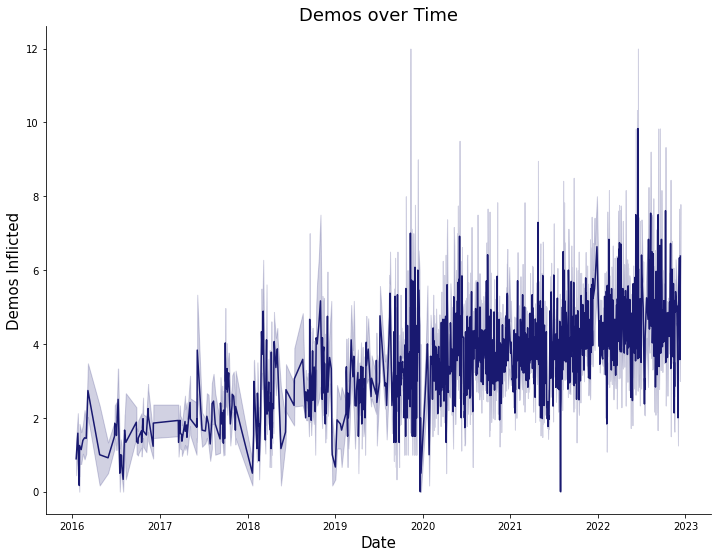

In [7]:
demos_over_time = sns.relplot(x="date", y="stats.demo.inflicted",
            kind="line", data=player_df, color='midnightblue',
            height=7.5, aspect=10/7.5)
# note this graph will take roughly 20-30 seconds to plot due to the size of the dataset——if we do not want confidence
# intervals we can set ci=None and it would be much faster

demos_over_time.ax.set_title("Demos over Time", fontsize=18)
demos_over_time.set_axis_labels("Date" , "Demos Inflicted", fontsize=15)

This is immediately pretty cool. We can see a clear increase in demos inflicted over time—and can make a reasonable assumption that this is the result of a shift towards more aggressive playstyles characterized by bumps, demos and boost steals. From the start of the RLCS to the current RLCS 2022-2023 season, we see an almost steady linear increase from an average of a single demo per player per series to about 4!

*Remark: Technically, not all series data in our dataset is directly from RLCS—there are collegiate matches, show matches, and others*

Next, let's split by tier and see if there are differences in number of demos inflicted between different skill levels of RLCS play.

In [8]:
player_df['tier'].unique() # 9 values

array(['B', 'S', 'C', 'A', 'Monthly', 'D', 'Weekly', 'Qualifier',
       'Show Match'], dtype=object)

In order from more skilled to less experienced (+ some other categories at the end), we have:

In [10]:
tier_order = ['S', 'A', 'B', 'C', 'D', 'Monthly', 'Weekly', 'Show Match', 'Qualifier']
palette = sns.color_palette('flare', n_colors=9)

<AxesSubplot:xlabel='stats.demo.inflicted', ylabel='tier'>

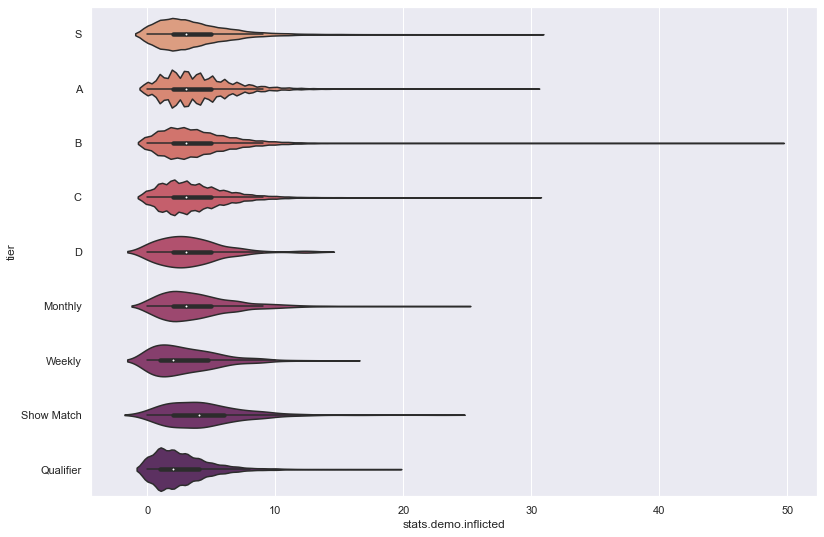

In [11]:
plt.subplots(1, figsize=(13, 9))
sns.set_theme()
sns.violinplot(x="stats.demo.inflicted", y='tier', data=player_df,
               palette=palette, order=tier_order)

There seem to be a few major outliers, which are making it difficult for us to compare. Let's check them out first, then graph again without them. 

I could be looking too much into it, but aggressive playstyles by one team do tend to elicit increased aggressiveness by the opposing team as a countermeasure strategy (or if they're tilted and just on the hunt), leading to an abnormally high overall number of demos, and I would guess many of the outlier series displayed here played out that way.

In [16]:
player_df.groupby(["tier"])["stats.demo.inflicted"].max()

tier
A             30.0
B             49.0
C             30.0
D             13.0
Monthly       24.0
Qualifier     19.0
S             30.0
Show Match    23.0
Weekly        15.0
Name: stats.demo.inflicted, dtype: float64

Let's find which players and teams were involved in these outlier series, for fun. Maybe it'll yield cool insights too.

In [18]:
# convert above result into dictionary
max_demos_by_tier = player_df.groupby(["tier"])["stats.demo.inflicted"].max().to_dict()
idx = []

# iterate over keys and values, find indices of the players who achieved those max demos
for tier, num in max_demos_by_tier.items():
    index = player_df[(player_df['tier'] == tier) & (player_df['stats.demo.inflicted'] == num)].index
    idx.append(index)
    
idx = [y for x in idx for y in x] # flatten our list because there can be multiple players in a given tier
# with the same max demos

# locate those games
player_df.iloc[idx]

,series_id,player._id,player.slug,player.tag,player.country,...,player.team.relevant,player.coach,player.substitute,tier,date
84384,28128,5f3d8fdd95f40596eae23d91,3d91-allushin,Allushin,ca,...,NaN,NaN,NaN,A,2021-10-29
108761,36253,5f3d8fdd95f40596eae240b2,40b2-comm,Comm,us,...,NaN,NaN,NaN,A,2022-10-23
190097,25104,60c7085325eac8dd77d6d67e,d67e-woody,Woody,us,...,NaN,NaN,NaN,B,2021-06-13
77120,25706,60241f4070e630f6d1013040,3040-bobsto,Bobsto,us,...,NaN,NaN,NaN,C,2021-08-14
79130,26376,612a232287f814e9fb000213,0213-scar,scar.,pt,...,NaN,NaN,NaN,D,2021-09-10
118175,1130,5f3d8fdd95f40596eae2434b,434b-royales,Royales,br,...,NaN,NaN,NaN,D,2020-04-26
193950,26389,5f3d8fdd95f40596eae2415a,415a-blau,Blau,pt,...,NaN,NaN,NaN,D,2021-10-02
195875,27030,60241f4070e630f6d1013040,3040-bobsto,Bobsto,us,...,NaN,NaN,NaN,Monthly,2021-09-18
187303,24173,60be08ea490bd8649dd30740,0740-tank,Tank,ph,...,NaN,NaN,NaN,Qualifier,2021-06-13
10635,3545,5f5ae820c6cbf591c568a3f7,a3f7-virtuoso,virtuoso,ie,...,NaN,NaN,NaN,S,2020-04-12


Right away, if you're familiar with Rocket League professional players and the content creation scene, you'll recognize a few of these players like I did. Woody is a player famous for his merciless demo chasing—in fact, his YouTube channel description says "Rocket League Demolitions Expert | 120,000 Demos | 8,500 Exterminations".

In addition, at the highest level of RLCS play, we have players like virtuoso and Comm, extremely well known for their well-perfected demo-heavy playstyles, diving in and out of the opponent's half landing opportunistic demos to clear out the defense without compromising their own positioning.

If we want to see which teams were involved, we can also do so by matching up the series_id to our main dataframe:

In [19]:
demo_idx = player_df.iloc[idx]["series_id"]
df.iloc[demo_idx]['matchup']

28128               faze clan vs rbg esports
36253                nrg esports vs version1
25104          charlotte phoenix vs team exe
25706             fish tacos vs unreal units
26376    impulse gaming white vs we dem bots
1130                        free win vs pera
26389    impulse gaming black vs we dem bots
27030      integrity esports vs unreal units
24173                   equinox vs exodus hk
3545                       endpoint vs karen
18286                  cuties vs rbg esports
19013             5head vs momentum shifters
Name: matchup, dtype: object

I won't lie, I don't recognize most of these teams. I know Allushin was a player for Faze, Comm for Version1, and virtuoso on Endpoint, but that's about it.

Anyway, back to our analysis. Let's remove some outliers and re-graph to see if we can find clear differences in average demos inflicted by tier. Looking at our earlier graph, a good cutoff seems to be somewhere like 18 demos, which removes 153 records.

<AxesSubplot:xlabel='stats.demo.inflicted', ylabel='tier'>

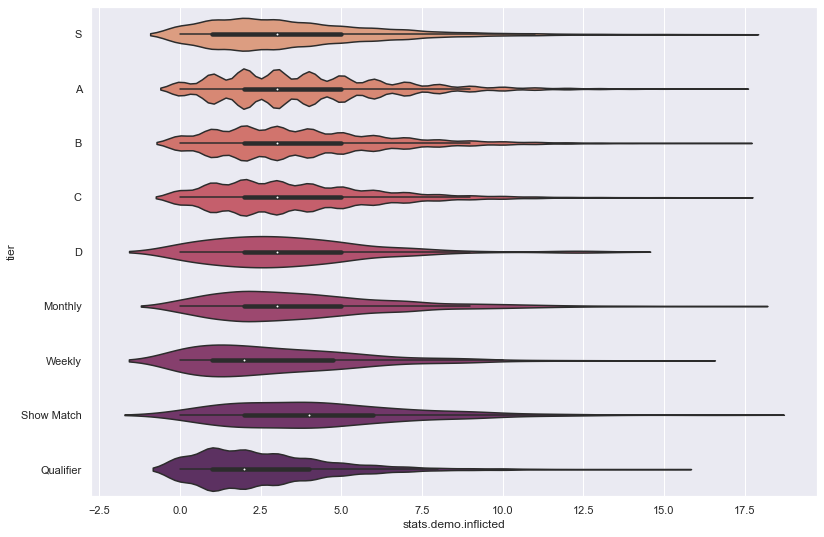

In [12]:
plt.subplots(1, figsize=(13, 9))
sns.set_theme()
sns.violinplot(x="stats.demo.inflicted", y='tier', data=player_df[player_df['stats.demo.inflicted'] < 18],
               palette=palette, order=tier_order)

Okay, now there are visible differences. Amongst the numerical tiers S-A-B-C-D, we don't really see a difference, but in weekly and qualifier matches, the mean number of inflicted demos is significantly lower, and in show matches, it's significantly higher. I don't have a good explanation for this to be honest. I guess RLCS qualifier matches are more high-stakes and players thus tend to play more "clean"/conventional and risk-averse, whereas show matches have high viewership and players like to use these types of matches to practice riskier/newer playstyles.

For more confirmation of this trend, we have a table which displays the same information.

In [21]:
player_df.groupby(["tier"])["stats.demo.inflicted"].mean()

tier
A             3.963016
B             3.813511
C             3.630605
D             3.342105
Monthly       3.896708
Qualifier     2.670354
S             3.569453
Show Match    4.308057
Weekly        3.041026
Name: stats.demo.inflicted, dtype: float64

Let's see which individual players demo the most:

In [88]:
demo_players = player_df.groupby('player.tag')['stats.demo.inflicted'].mean().sort_values(ascending=False)[0:35]
demo_players = demo_players.reset_index()
demo_players[:10]
# I chose 35 because I wanted to include Comm, the current posterboy of successful demo-oriented playstyles at 
# the highest level of the RLCS.

,player.tag,stats.demo.inflicted
0,Woody,26.250000
1,paolotiu,14.000000
2,flikkas,14.000000
3,Kingy,13.000000
4,PerlikaPavel357,13.000000
5,Nacho,11.000000
6,Mad,11.000000
7,cambam,10.500000
8,Claven,10.373134
9,Kenshiro,10.333333


Text(0, 0.5, 'Average Demos per Series')

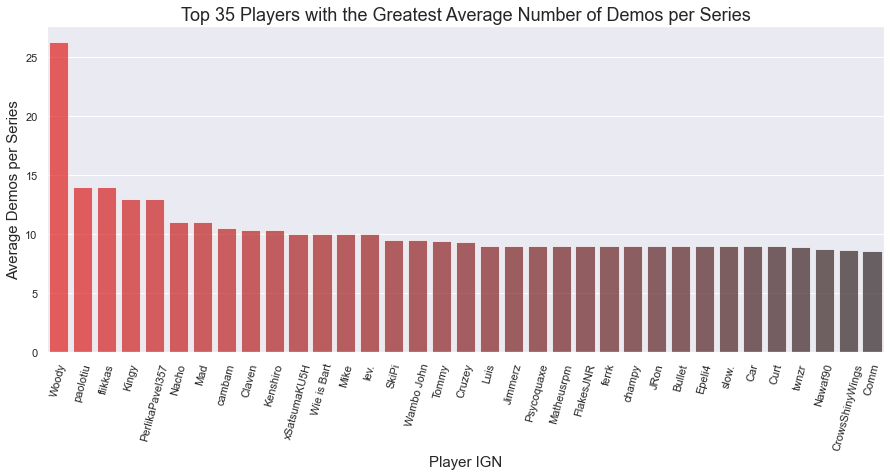

In [120]:
plt.subplots(1, figsize=(15, 6))
player_demos_graph = sns.barplot(x='player.tag', y='stats.demo.inflicted', data=demo_players,
                    palette=sns.color_palette("dark:red_r", n_colors=35), alpha=0.7)

plt.xticks(rotation=75);
player_demos_graph.set_title("Top 35 Players with the Greatest Average Number of Demos per Series", fontsize=18)
player_demos_graph.set_xlabel("Player IGN", fontsize=15) # IGN = in-game name
player_demos_graph.set_ylabel("Average Demos per Series", fontsize=15)

Quick remark: I would've also loved to investigate which teams demo the most, and whether a team's average number of demos correlates with their series winrate, but due to the design/setup of our data, this is very difficult to do because we only have demo data for individual players. We don't know what teams they belong on at the time of the matches, and teams constantly are being re-named, players are being traded, etc, so the numerous other variables are not constant by any means and we won't be able to get any clean insights in my opinion.

### Shots taken vs. series outcome

Complicatedly, series outcome is stored in our main dataframe in a nested dictionary under the blue and orange columns—the winning team has a "winner: True" key-value pair while the losing team does not. We'll need to access it and pair it with our shots data to conduct our analysis. Since one team winning/or losing automatically implies the other losing/winning, we'll only need to look at one team's data, such as blue, and we'll impute the NaNs with Falses.

In [15]:
blue_wins = pd.json_normalize(df["blue"])['winner']
blue_wins = blue_wins.fillna(False)
blue_wins

0         True
1        False
2        False
3        False
4        False
         ...  
38256     True
38257     True
38258     True
38259     True
38260     True
Name: winner, Length: 38261, dtype: bool

Next, let's look at the ratio of blue team's shots to orange team's shots throughout the series. This gives us a good way to compare how many more/fewer shots a team took, versus their eventual series outcome.

In [13]:
shots_ratio = blue_players.groupby("series_id")["stats.core.shots"].sum() / orange_players.groupby("series_id")["stats.core.shots"].sum()
shots_ratio

series_id
0        1.518519
1        0.756757
2        0.633333
3        0.428571
4        1.375000
           ...   
38256    0.714286
38257    1.333333
38258    1.333333
38259    1.000000
38260    1.222222
Name: stats.core.shots, Length: 38261, dtype: float64

Finally, we construct our simple bar graph:

Text(0, 0.5, 'Shot Ratio')

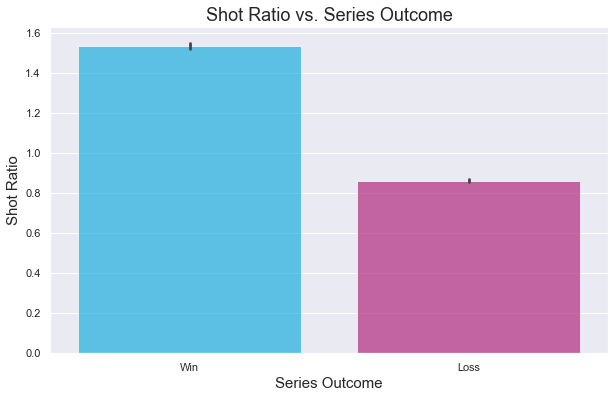

In [19]:
plt.subplots(1, figsize=(10, 6))
shots = sns.barplot(x=blue_wins.map({True: 'Win', False: 'Loss'}), y=shots_ratio, 
                    palette=['deepskyblue', 'mediumvioletred'], alpha=0.7)

shots.set_title("Shot Ratio vs. Series Outcome", fontsize=18)
shots.set_xlabel("Series Outcome", fontsize=15)
shots.set_ylabel("Shot Ratio", fontsize=15)

In [20]:
shots_ratio[blue_wins].mean(), shots_ratio[~blue_wins].mean()

(1.5364651922142467, 0.8620205116883434)

Perfect. This is pretty much as expected—if you're taking more shots on goal than your opponent, you're much more likely to win. In particular, when your team wins, you're on average taking 1.54 shots for every shot by the opposition, whereas on average you take only 0.862 shots for every shot when you lose.

### Saves taken vs. series outcome

What about saves? Can they predict series outcome?

To be honest, no, I don't think so. If anything, more saves might predict a team's loss, because it means they are constantly on the backfoot and being pressured on defense. It implies a lack of ball possession and forced reactionary defense, to me at least. Good teams generally do not spend as much time on defense, at least on the goal line—they're challenging early, blocking threatening plays and shots before they even occur. But let's take a look at the data at least.

The procedure will be the same—we'll find the ratio of blue to orange team total saves and compare with the series outcome.

In [21]:
saves_ratio = blue_players.groupby("series_id")["stats.core.saves"].sum() / orange_players.groupby("series_id")["stats.core.saves"].sum()
saves_ratio = saves_ratio[saves_ratio != np.inf] # avoid division by zero, which in NumPy yields infinity!
saves_ratio

series_id
0        0.652174
1        0.733333
2        1.550000
3        1.700000
4        0.678571
           ...   
38256    1.500000
38257    0.761905
38258    0.885714
38259    1.100000
38260    0.888889
Name: stats.core.saves, Length: 38259, dtype: float64

Text(0, 0.5, 'Saves Ratio')

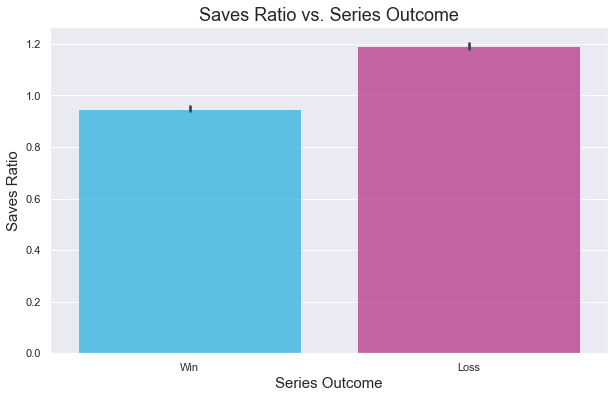

In [24]:
plt.subplots(1, figsize=(10, 6))
shots = sns.barplot(x=blue_wins.map({True: 'Win', False: 'Loss'}), y=saves_ratio, 
                    palette=['deepskyblue', 'mediumvioletred'], alpha=0.7)

shots.set_title("Saves Ratio vs. Series Outcome", fontsize=18)
shots.set_xlabel("Series Outcome", fontsize=15)
shots.set_ylabel("Saves Ratio", fontsize=15)

In [25]:
saves_ratio[blue_wins].mean(), saves_ratio[~blue_wins].mean()

(0.9493189960477352, 1.191580511507665)

Indeed, this aligns with our hypothesis. Your team is in fact likely to have more saves if you lose the series. Now, this is of course not saying that if you make more saves, you are more likely to lose—it is not a causal relationship, but merely a correlational observation. 

### Next let's check out how shooting percentage (shot accuracy, essentially) correlates with series outcome.

In [31]:
shooting_pct = player_df.groupby(['series_id', 'team_colour'])['stats.core.shootingPercentage'].mean()
shooting_pct

series_id  team_colour
0          Blue           29.126984
           Orange         25.637326
1          Blue           29.230769
           Orange         43.589744
2          Blue           19.780220
                            ...    
38258      Orange         26.666667
38259      Blue           33.771930
           Orange         25.952381
38260      Blue           35.454545
           Orange         21.288515
Name: stats.core.shootingPercentage, Length: 76522, dtype: float64

At this point we just need to massage our blue_wins array into something twice as long which is consistent with this series. In other words, we need to interweave NOT blue_wins in between to match this!

In [32]:
alt_wins = np.empty(2*len(blue_wins), dtype=blue_wins.dtype) # initialize empty array with correct size and dtype
# interweave blue wins and ~blue_wins (i.e. orange wins)
alt_wins[::2] = blue_wins
alt_wins[1::2] = ~blue_wins

alt_wins[0:15], len(alt_wins) # sanity check. indeed whenever blue wins, orange loses, and vice versa.

(array([ True, False, False,  True, False,  True, False,  True, False,
         True,  True, False,  True, False, False]),
 76522)

In [56]:
# once again, map the outcomes to more interpretable labels:
outcome = {True: 'Win', False: 'Loss'}

Text(0, 0.5, 'Shooting Percentage (%)')

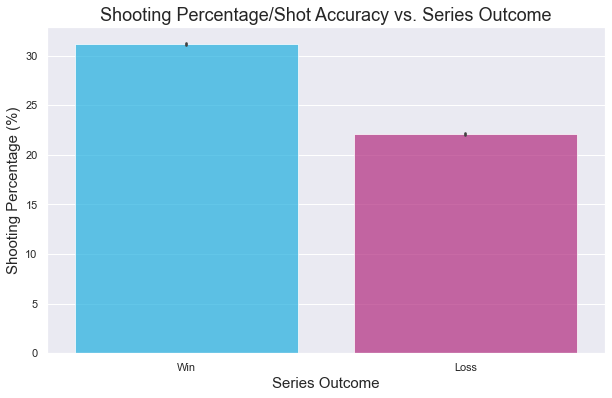

In [57]:
plt.subplots(1, figsize=(10, 6))
shot_accuracy = sns.barplot(x=[outcome[res] for res in alt_wins], y=shooting_pct,
                    palette=['deepskyblue', 'mediumvioletred'], alpha=0.7)

shot_accuracy.set_title("Shooting Percentage/Shot Accuracy vs. Series Outcome", fontsize=18)
shot_accuracy.set_xlabel("Series Outcome", fontsize=15)
shot_accuracy.set_ylabel("Shooting Percentage (%)", fontsize=15)

In [58]:
shooting_pct[alt_wins].mean(), shooting_pct[~alt_wins].mean()

(31.18568103842318, 22.09610451908546)

Indeed, shooting percentage appears to quite an important aspect of winning series. On average, players shoot more accurately by 9.09% when they win a series versus when they lose. Now, the complex dynamics of the game mean this isn't the full picture—sometimes you want to intentionally miss off the post to lure the defender out of the goal, or smash it off the corner as a pass to your teammate rather than directly shooting, but in general, in combination with our shots analysis, if you're taking more shots and putting more of them on net, you're likely to win more. Not too surprising but still interesting.

### To-do. Next let's check stats.core.shootingPercentage and advanced.rating. Left to do—3 things: 1: average rating vs. series outcome. not sure if interesting, reconsider? 2 and 3: For both, also try out overall over time, see if anything cool. split by tier too!